In [8]:
import zipfile
import os

# Path to the zip file
zip_file_path = r'C:\Users\Farez Laptop\Dropbox\My PC (DESKTOP-0DN7O4V)\Desktop\Assignment # 4\Netflix_data.zip'
extracted_folder_path = r'C:\Users\Farez Laptop\Dropbox\My PC (DESKTOP-0DN7O4V)\Desktop\Assignment # 4\Netflix_shows_movies'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Rename the file from netflix_data.csv to netflix_shows_movies.csv
original_file_path = os.path.join(extracted_folder_path, 'netflix_data.csv')
new_file_path = os.path.join(extracted_folder_path, 'netflix_shows_movies.csv')
os.rename(original_file_path, new_file_path)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Farez Laptop\\Dropbox\\My PC (DESKTOP-0DN7O4V)\\Desktop\\Assignment # 4\\Netflix_shows_movies\\netflix_data.csv' -> 'C:\\Users\\Farez Laptop\\Dropbox\\My PC (DESKTOP-0DN7O4V)\\Desktop\\Assignment # 4\\Netflix_shows_movies\\netflix_shows_movies.csv'

In [9]:

import pandas as pd
# Loading the dataset
netflix_shows_movies = pd.read_csv(new_file_path)


# Displaying the first few rows and column info
print(netflix_shows_movies.head())
print(netflix_shows_movies.info())
print(netflix_shows_movies.isnull().sum())




    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [12]:
# Handling missing values

# Drop rows with any missing values
netflix_shows_movies = netflix_shows_movies.dropna()


In [13]:
# Checking for remaining missing values
print(netflix_shows_movies.isnull().sum())

# Verify the data types
print(netflix_shows_movies.info())



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


In [14]:
# Describing and conducting statistical analysis on the data
# Describing the data
print(netflix_shows_movies.describe())

# Describing Data types
print(netflix_shows_movies.dtypes)

# Value counts for Genres(listed_in) column
print(netflix_shows_movies['listed_in'].value_counts())


            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Cl

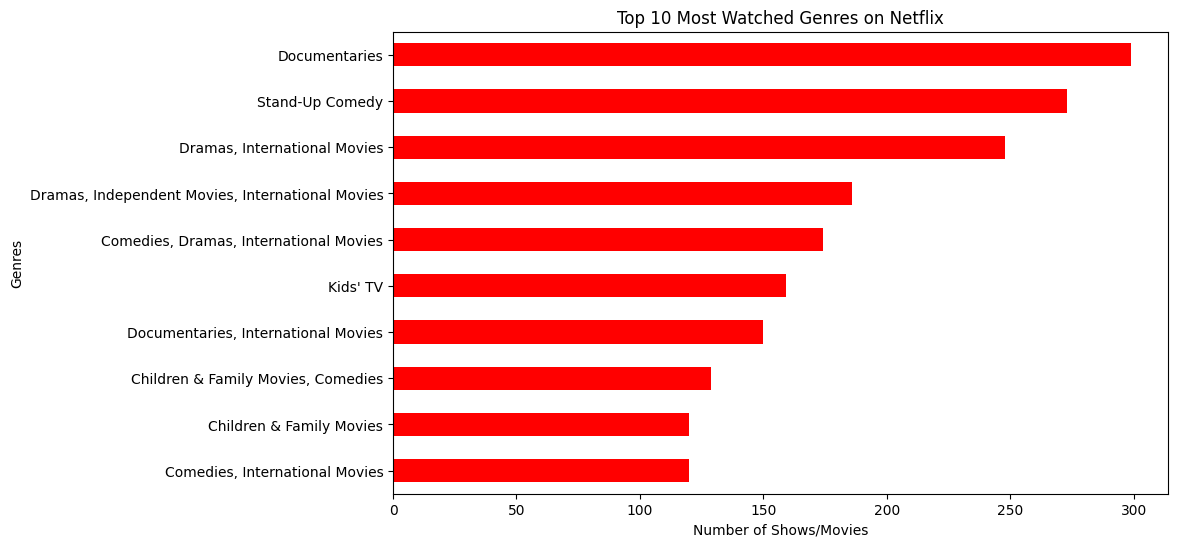

In [18]:
import matplotlib.pyplot as plt
# Getting the top genre occurrences
genre_counts = netflix_shows_movies['listed_in'].value_counts().head(10)  # Get the top 10 most watched genres

# Plotting the most watched genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='red')

# Adding labels and title
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genres')
plt.title('Top 10 Most Watched Genres on Netflix')

# Inverting y-axis for most common genre on top
plt.gca().invert_yaxis()

# Displaying the plot
plt.show()


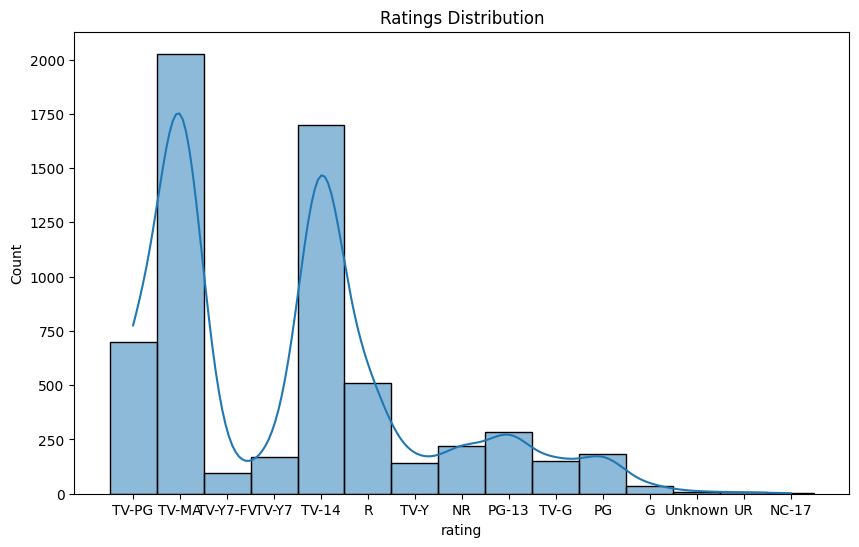

In [21]:
# Plotting for Ratings distribution
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_shows_movies, x='rating', bins=20, kde=True)
plt.title('Ratings Distribution')
plt.show()